# Lab4.1 Image Segmentation; Basic Methods

In this lab, you will be familiar with basic segmentation methods including manual segmentation, thresholding and K-means clustering. 

In order to quantify the accuracy of the segmentation methods, similarity measures will be utilized. In this laboratory, you also are expected to implement one of these measure namely as Dice coefficient.


## Make Sure You Already Installed OPENCV on Your Laptop

If not yet, Pip install opencv-contrib-python

## First Part: Manual Segmentation

Manual segmentation, here, is done by moving your mouse pointer on the loaded image and select some points on the target region. This selection will be done in such a way that you will select some points by using right click of the mouse while the last point will be recognized by a left mouse click. An interpolation method, then, will be employed for interpolation to generate a curve between the selected points.

In [1]:
# Just For Reading
import cv2 # image processing and machine vision package
import numpy as np
from scipy import interpolate as ip
import matplotlib.pyplot as plt
from scipy.interpolate import spline

In [2]:
# Just For Reading
refPt = [] # Selected points by user
flag = True # for right click checking

In [3]:
# Just For Reading
# This function gets the interpolated points and will return two masks; one contains the boundary of the points and the other contains the filled region inside the boundary  
def Mask_Generator(shape,interpX,interpY): # Generate edge(mask) and filled(mask2) Masks
        mask = np.zeros(shape)
        for i in range(len(interpX)):
                mask[interpX[i],interpY[i]]=255
        a,b = shape
        mask2 = np.zeros(shape)
        for i in range(a):
                MaskRow = mask[i,:]
                Index = np.where(MaskRow==255)[0]
                if len(Index)==0:
                        continue
                SIndex = Index[0] # First index of ones from left
                EIndex = Index[-1]# First index of ones from right
                for j in range(SIndex,EIndex): # Fill between them!
                        mask2[i,j]=255        
        return (mask,mask2)

In [4]:
# Just For Reading
# This function opens the image window for mouse clicks (for click_and_crop function) and as soon as flag gets false this function will close the image window
def Selection(imageC):  # Color Image
        global refPt
        while flag:
                cv2.imshow('image', imageC)
                key = cv2.waitKey(10) & 0xFF
                if key == ord("z"): # break the loop if 'z' pressed. not necessary
                        break

In [5]:
# Just For Reading
# This functions works as an event handler of clicks
def click_and_crop(event, x, y, flags, param): 
        global refPt,flag,image
        if (event == cv2.EVENT_LBUTTONDOWN): # if left click:
                refPt.append((y, x))
                cv2.circle(imageC,(x,y),3,(255,0,0),-1)
        elif (event == cv2.EVENT_RBUTTONDOWN): # if right click:
                refPt.append((y, x))
                cv2.circle(imageC,(x,y),5,(0,255,255),-1)
                flag=False

### Manual Lung Segmentation in a CT slice (Left and Right Lungs)


Steps: 

1- Load the image "Lung.jpg" by using 'cv2.imread' two times. One in gray level mode for processing and one in color mode for presentation.

2- Use 'cv2.namedWindow' and set the window name exactly as "image".

3- Define some points on the lung boundary using 'cv2.setMouseCallback' with 'click_and_crop' function. Please note this figure will be shown when you call the 'Selection' function.

4- Set flag equals to True

Now your selected points were saved in 'refPt'. Since you are going to segment left and right lungs separately, you will have two sets of points. To save them separately, follow:

5- Define an array and save the current selected points (points = refPt)

6- Empty the 'refPt' to prepare it for selecting the next set of points (the other lung)

7- Call 'selection' again to set new points (for the other lung region) on image window

8- Repeat step 5 (points2 = refPt)

In [6]:
# TODO: implement steps 1:2
# Insert The FileName
imgname = 'Lung.jpg'
# Read the Image in gray level for process
imageG =  cv2.imread(imgname,0)
# Read the Image in color mode for process
imageC = cv2.imread(imgname,1)
# Set the name of the image window as "image"
cv2.namedWindow("image")

In [7]:
# TODO: implement steps 3:4
# Call the function 'cv2.setMouseCallback'
cv2.setMouseCallback('image',click_and_crop)
# Call the function 'Selection'
Selection(imageC)
# Set the flag
flag = True
print('\nselected points for first part: ',refPt)
print ('\n\n----------------------------\nSecond segment: \nPress LCLICK to select, RCLICK to select and quit...')


selected points for first part:  [(209, 171), (221, 153), (239, 143), (272, 122), (285, 121), (310, 120), (346, 134), (362, 159), (362, 180), (348, 213), (329, 225), (285, 213), (263, 213), (242, 212), (217, 202), (213, 191)]


----------------------------
Second segment: 
Press LCLICK to select, RCLICK to select and quit...


In [8]:
# TODO: implement steps 5:8
# convert to array the first set of selected points
points = np.asarray(refPt) 
# clear the 'refPt' to prepare it for the second set of points
refPt=[]
# Call the function 'Selection'
Selection(imageC)
print('\nselected points for second part: ',refPt)
# Convert to array the second set of selected points
points2 = np.asarray(refPt) 


selected points for second part:  [(183, 310), (189, 295), (211, 307), (232, 298), (251, 302), (280, 308), (307, 313), (323, 302), (328, 299), (357, 315), (361, 361), (330, 386), (306, 396), (266, 402), (228, 398), (211, 354), (195, 336), (191, 321)]


#### Interpolation preparation

Now, we have to interpolate the selected points to crearte a segmentation mask. The first steps here is to make it clear that
the last selected point should be connected to the first selected point because it is a closed contour. We have to do it separately for X and Y coordinates for both of the selected points. In the cell below we did it for X coordinates of the first set of points. 

9- You have to do it in the same way for Y coordinates of first set of points and then X and Y coordinates of the second set of selected points.

In [9]:
LXs = points[:,0] # x of first set of points
LXt = list(LXs)
LXt.append(points[0,0]) # add the first points to the end of the list for create circular structure
LXs = np.asarray(LXt)

In [10]:
# TODO: implement steps 9
# Y of first set of points
LYs = points[:,1]
LYt = list(LYs)
LYt.append(points[0,1]) # add the first points to the end of the list for create circular structure
LYs = np.asarray(LYt)
# X of second set of points
RXs = points2[:,0]
RXt = list(RXs)
RXt.append(points2[0,0]) # add the first points to the end of the list for create circular structure
RXs = np.asarray(RXt)
# Y of second set of points
RYs = points2[:,1]
RYt = list(RYs)
RYt.append(points2[0,1]) # add the first points to the end of the list for create circular structure
RYs = np.asarray(RYt)

#### B-Spline Interpolation

Employing a B-Spline interpolation method, we can, now, interpolate the selected points for left and right lungs separately.
For the left one, it was done in the following cell.

10- Interpolate the selected points of the right lung

In [11]:
tckL,uL = ip.splprep( [LXs,LYs] ,k=3 )
xnewL,ynewL = ip.splev( np.linspace( 0, 1, 1600 ), tckL,der = 0)
rounded_xnewL = np.int64(np.round_(xnewL)) # interpolation gives float! but we need int
rounded_ynewL = np.int64(np.round_(ynewL))

In [12]:
# TODO: implement steps 10
tckR,uR = ip.splprep( [RXs,RYs] ,k=3 )
xnewR,ynewR = ip.splev( np.linspace( 0, 1, 1600 ), tckR,der = 0)
rounded_xnewR = np.int64(np.round_(xnewR)) # interpolation gives float! but we need int
rounded_ynewR = np.int64(np.round_(ynewR))

#### Maske Generation

By using function 'Mask_Generator' you can generate a mask for each of the interpolated points.
As we have two segmented regions from one image in two different masks, you should combine them
into one mask. So the easiest way is to compute their union. 

11- Generate masks for each of the interpolated sets

12- Create an array with the same size of the image

13- Compute the union of the two generated masks and save it in the created array
(First binarize the masks, compute the union and then multiply it by 255 )


In [13]:
# TODO: implement step 11
# Mask for first set of selection
(lm,LeftMask) = Mask_Generator(imageG.shape,rounded_xnewL,rounded_ynewL)
# Mask for second set of selection
(rm,RightMask) = Mask_Generator(imageG.shape,rounded_xnewR,rounded_ynewR)

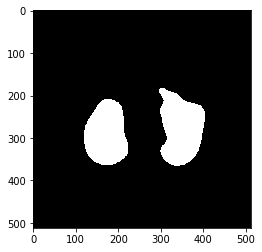

In [41]:
# TODO: implement step 12:13
# Find the size of input image in gray mode
a,b = imageG.shape
# Create an array with the same size of image
Mask = np.ndarray((a,b)) 
# Binarizing left mask
l = np.int64(LeftMask/np.max(np.ndarray.flatten(LeftMask)))
# Binarizing right mask
r = np.int64(RightMask/np.max(np.ndarray.flatten(RightMask)))
# Compute the union of (l,r)
Mask = l
Mask = Mask + r

#### Overlaying Contours on the Image

In this step, boundary of the generated mask will be depicted on the image as the delineated contour.

14- Empolying 'cv2.line' to draw a line between each of the interpolated points for both of the lungs. As this function draws a line segment by connecting two consecutive points, you have to recall each f two consecutive points in a 'for' loop).


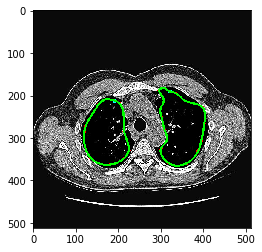

In [43]:
# TODO: implement step 14

for i in range(len(xnewL)-1):
        # for the left side
        cv2.line(imageC,(rounded_ynewL[i],rounded_xnewL[i]),(rounded_ynewL[i+1],rounded_xnewL[i+1]),(0,255,0),3)
        # for the right side
        cv2.line(imageC,(rounded_ynewR[i],rounded_xnewR[i]),(rounded_ynewR[i+1],rounded_xnewR[i+1]),(0,255,0),3)
plt.imshow(imageC,cmap='gray')
plt.show()

## Second Part: Simple Thresholding

In this part, we are going to find a specific intensity of the image and use it as a threshodling for segmentation.
This means, we are looking for the pixels in the image which their intensities are lower than the threshold value.

15- You are expected to find the intensity values of all the pixels inside the segmented regions in the previous part.

16- Find the minimum pixel value.

17- Use 'cv2.threshold' and set the threshold to the minimum value you found. 

18- Imshow the thresholded image using image plt.imshow

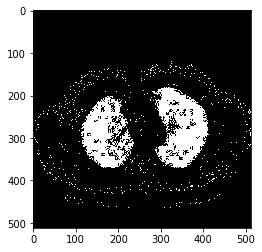

In [44]:
# TODO: implement step 15:18
# intensity range:
intensities = []
a,b = LeftMask.shape
for i in range(a):
        for j in range(b):
                if LeftMask[i,j]==255 or RightMask[i,j]==255:
                        intensities.append(imageG[i,j])
intensities = np.unique(intensities)

# set a threshold equals to min of intensities
threshold = intensities[0]
# compute the thresholded image
ret,thresh1 = cv2.threshold(imageG,threshold,np.max(np.ndarray.flatten(RightMask)),cv2.THRESH_BINARY_INV)
plt.imshow(thresh1,cmap='gray')
plt.show()


## Third Part: K-Means Clustering 

For this part, K-Means clustering method will be utilized for segmenting the lungs. 

Function 'cv2.kmeans(A,B,C,D,E,F)' performs the clustering where A is the main image in vector format (not a matrix); B is number of clusters; C=None, D is criteria(set it to maximum iteration+specified accuracy); E refers to the number of performing with different initial labeling and F represents Flag.   

19- Set the A:F parameters and call the function : compactness,labels,centers = cv2.kmeans(A,B,C,D,E,F). Please name the outputs exactly as what we mentioned here.

In [45]:
# TODO: implement step 19
# Convert the gray image into a vector
Z = imageG.reshape((-1))
Z = np.float32(Z) 
# choose proper number of iteration and a specific accuracy
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.5)        
flags = cv2.KMEANS_RANDOM_CENTERS
# Find a proper number of clusters (B parameter)
compactness,labels,centers = cv2.kmeans(Z,4,None,criteria,10,flags)

In [46]:
center = np.uint8(centers)
res = center[labels.flatten()]
KmeansMask = res.reshape((imageG.shape))
miu = np.unique(KmeansMask)
thresh = miu.min()

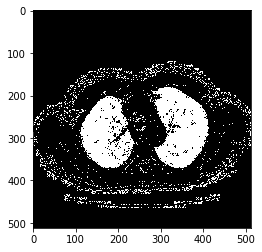

In [47]:
# TODO 20: Use the 'thresh' value from previous cell for a thresholding like what you did in TODO17 and show the result

ret,Kmeans_thresh = cv2.threshold(imageG,thresh,np.max(np.ndarray.flatten(RightMask)),cv2.THRESH_BINARY_INV)
plt.imshow(Kmeans_thresh,cmap='gray')
plt.show()

## Fourth Part: Quantitative Comparison with Dice Criteria

We have a manual segmentation mask (our gran truth) and two masks from thresholding and clustering methods. 

21- Complete the "dist_Dice function" according to the formula 2*length(intersect(X,Y))/length(X)+length(Y) 

22- Compute the dice coefficients between manual contour and two automatic contours.

In [60]:
# TODO: implement step 21
def dist_Dice(ref,img):
        idx_img = np.where(img==255)
        idx_ref = np.where(img==255)
        im = np.int64(img/np.max(np.ndarray.flatten(img)))
        re = np.int64(ref/np.max(np.ndarray.flatten(ref)))
        # calculate the intersection of (im,re)
        intersect_img = np.intersect1d(np.ndarray.flatten(im),np.ndarray.flatten(re))
        intersect_img = intersect_img*255
        idx_inter = np.where(intersect_img==255)
        dist = 2*len(idx_inter[0])/(len(idx_img)+len(idx_ref))
        return dist

In [61]:
# TODO: implement step 22
d1=dist_Dice(Mask,thresh1)
d2=dist_Dice(Mask,Kmeans_thresh)
print(d1,d2)

0.5 0.5
